In [25]:
%pylab inline
import numpy as np
from glob import glob
from utils import add_module_paths
add_module_paths()
from data.utils import load_data
import seaborn as sns
sns.set_style('white')

Populating the interactive namespace from numpy and matplotlib


# Global Statistics

Questions: How many examples are we working with?

In [8]:
print 'Training Set Instances:'
print 'Positive Examples:', len(glob('../data/aclImdb/train/pos/*.txt'))
print 'Negative Examples:', len(glob('../data/aclImdb/train/neg/*.txt'))

Training Set Instances:
Positive Examples: 12500
Negative Examples: 12500


In [9]:
print 'Testing Set Instances'
print 'Positive Examples:', len(glob('../data/aclImdb/test/pos/*.txt'))
print 'Negative Examples:', len(glob('../data/aclImdb/test/neg/*.txt'))

Testing Set Instances
Positive Examples: 12500
Negative Examples: 12500


In [32]:
print 'Total number of unique words:', len(open('../data/aclImdb/imdb.vocab', 'r').readlines())

Total number of unique words: 89527


## What is the distribution of the ratings?

In [14]:
negative_data = load_data(folder_location='../data/aclImdb', sentiments='neg')
positive_data = load_data(folder_location='../data/aclImdb', sentiments='pos')

In [15]:
pos_ratings = np.array(positive_data['rating'])
neg_ratings = np.array(negative_data['rating'])

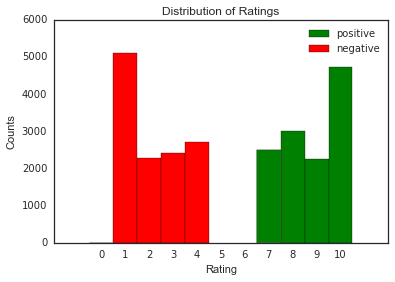

In [31]:
plt.hist(pos_ratings,bins=np.arange(6.5,11.5, 1), label='positive', color='green')
plt.hist(neg_ratings,bins=np.arange(-0.5,5.5, 1), label='negative', color='red')
plt.xticks(arange(0,11), arange(0,11))
plt.xlabel('Rating')
plt.ylabel('Counts')
plt.legend()
plt.title('Distribution of Ratings')

## What are the kind of words in each category?

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
cv = CountVectorizer()

In [35]:
cv.fit(negative_data['text'])

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [41]:
cv.transform(negative_data['text'])

<12500x54251 sparse matrix of type '<type 'numpy.int64'>'
	with 1714458 stored elements in Compressed Sparse Row format>

In [42]:
from collections import Counter

In [104]:
import nltk
import string
stopwords = nltk.corpus.stopwords

In [172]:
STOPWORDS = stopwords.words('english') + list(string.punctuation) + ['``', '...', '--', ',', ':', 'br', '\'s', '\'', 'n\'t', '\'\'']

def word_counter(sentence_list, remove_these = STOPWORDS):
    """
        Returns words statistics for a list of sentences
        @params:
            sentence_list: list of sentences (this wll be joined using a space)
            remove_these[=STOPWORDS]: list of characters to remove from the corpus before counting
        @returns:
            Counter object with the words counted.
    """
    corpus = ' '.join(sentence_list)
    words = nltk.word_tokenize(' '.join([w for w in nltk.word_tokenize(corpus.lower()) if w not in remove_these]))
    return Counter(words)

In [173]:
all_words = word_counter(negative_data['text'].tolist() + positive_data['text'].tolist()).most_common(100)
neg_words = word_counter(negative_data['text'].tolist()).most_common(100)
pos_words = word_counter(positive_data['text'].tolist()).most_common(100)

In [174]:
import pandas as pd

In [175]:
pd_all_words = pd.DataFrame(all_words[:15],columns=['Word', 'Count'])
pd_neg_words = pd.DataFrame(neg_words[:15],columns=['Word', 'Count'])
pd_pos_words = pd.DataFrame(pos_words[:15],columns=['Word', 'Count'])

In [176]:
pd_all_words['Corpus'] = 'All'
pd_neg_words['Corpus'] = 'neg'
pd_pos_words['Corpus'] = 'pos'

In [177]:
pd_to_plot = pd.concat([pd_all_words, pd_pos_words, pd_neg_words]) # keep this ordering to ensure pos is green

(0, 25000)

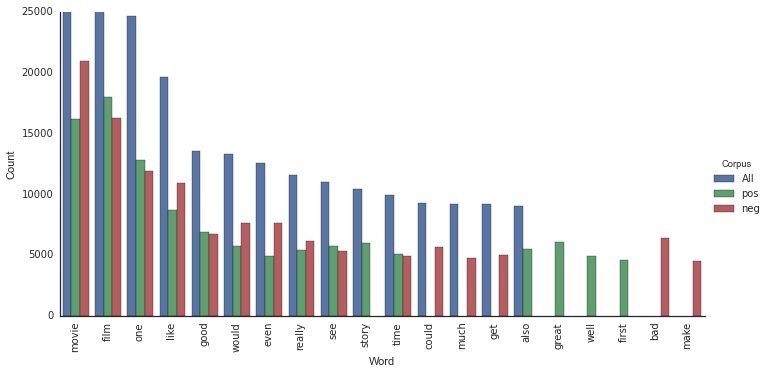

In [178]:
plt.figure(figsize=(5,15))
sns.factorplot(x='Word', y='Count', hue='Corpus', data=pd_to_plot, kind='bar', size=5, aspect=2)
plt.xticks(rotation='vertical')
plt.ylim((0,25000))